In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from itertools import permutations
from collections import Counter

# Function to generate colored noise with a given beta exponent
def colored_noise(beta, size):
    # Generate white noise
    white_noise = np.random.randn(size)
    
    # Apply Fourier transform to get frequency components
    f_transform = fft(white_noise)
    
    # Get frequencies corresponding to the Fourier transform
    frequencies = fftfreq(size)
    
    # Modify the amplitude of each frequency component
    amplitudes = np.abs(frequencies)
    amplitudes[amplitudes == 0] = 1  # Avoid division by zero
    modified_amplitudes = amplitudes ** (-beta / 2.0)
    
    # Apply the modified amplitudes to the frequency components
    f_transform *= modified_amplitudes
    
    # Perform the inverse Fourier transform to get the time series
    colored_noise = np.fft.ifft(f_transform).real
    
    return colored_noise

# Parameters
beta = 5/3
size = 1000

# Generate the time series
# time_series = colored_noise(beta, size)
# np.save('data/time_series.npy', time_series)
time_series = np.load('data/time_series.npy')

# Normalize the time series to range -1 to 1
time_series = 2 * (time_series - np.min(time_series)) / (np.max(time_series) - np.min(time_series)) - 1

# Histogram Probability
def plot_histogram_probability(ax, data, bins=30):
    counts, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], alpha=0.7, label='Histogram Probability')
    ax.set_title('Histogram Probability')
    ax.set_xlabel('Value')
    ax.set_ylabel('Probability')
    # ax.legend()

# Spectral Probability
def plot_spectral_probability(ax, data,is_loglog=False):
    f_transform = fft(data)
    power_spectrum = np.abs(f_transform) ** 2
    frequencies = fftfreq(len(data))
    
    # Only use positive frequencies
    positive_frequencies = frequencies > 0
    frequencies = frequencies[positive_frequencies]
    power_spectrum = power_spectrum[positive_frequencies]
    
    # Normalize power spectrum
    spectral_probabilities = power_spectrum / np.sum(power_spectrum)
    
    if is_loglog == True:
        ax.loglog(frequencies, spectral_probabilities, label='Spectral Probability')
    else:
        ax.plot(frequencies, spectral_probabilities, label='Spectral Probability')
    ax.set_title('Spectral Probability')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Probability')
    # ax.legend()
    
  
    
def plot_permutation_probability(ax, time_series, emb_dim=3):
    # Create permutations of embedding dimension
    perms = list(permutations(range(emb_dim)))
    perm_count = {perm: 0 for perm in perms}
    
    # Embed the time series
    embedded = np.array([time_series[i:i + emb_dim] for i in range(len(time_series) - emb_dim + 1)])
    
    # Find the permutation for each embedded vector
    for emb in embedded:
        perm = tuple(np.argsort(emb))
        perm_count[perm] += 1
    
    # Calculate probabilities
    total_count = sum(perm_count.values())
    perm_prob = {perm: count / total_count for perm, count in perm_count.items()}
    
    # Plot the permutation probabilities
    labels, values = zip(*perm_prob.items())
    ax.bar(range(len(labels)), values, tick_label=[str(label) for label in labels])
    ax.set_xticklabels([str(label) for label in labels], rotation=45)
    ax.set_title('Permutation Probability ($d= ${})'.format(emb_dim))
    ax.set_xlabel('Permutation')
    ax.set_ylabel('Probability')    




In [ ]:
# Write the folder "dataframe" in a zip file
import zipfile
import os
import pandas as pd
import shutil

# Create a folder to store the dataframes
if not os.path.exists('dataframe'):
    os.makedirs('dataframe')

# Create a dataframe
df = pd.DataFrame({'time_series': time_series})

# Save the dataframe to a csv file
df.to_csv('dataframe/time_series.csv', index=False)

# Create a zip file to store the dataframe
with zipfile.ZipFile('dataframe.zip', 'w') as zipf:
    zipf.write('dataframe/time_series.csv', 'time_series.csv')    

<ipython-input-74-1ee23a0e0227>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)


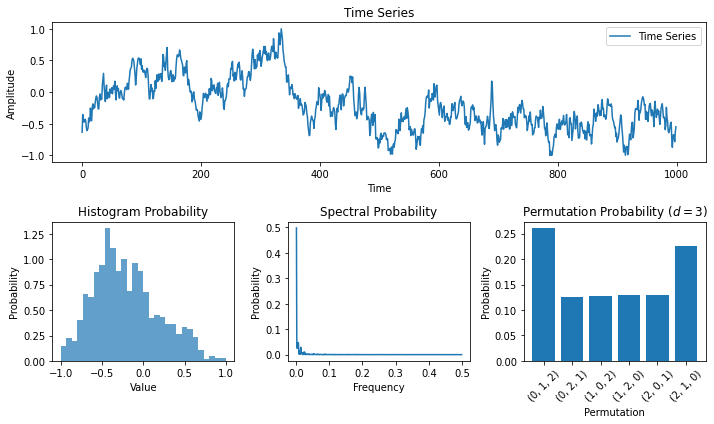

In [74]:

fig, axes = plt.subplots(2, 3, figsize=(10, 6), gridspec_kw={'height_ratios': [2, 2]})

# Merge the first two subplots
axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)

# Plot time series again to the merged subplot
axes[0, 0].plot(time_series, label='Time Series')
axes[0, 0].set_title('Time Series')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].legend()

# Plot histogram probability
plot_histogram_probability(axes[1, 0], time_series)

# Plot spectral probability
plot_spectral_probability(axes[1, 1], time_series,is_loglog=False)

# Plot permutation probability
plot_permutation_probability(plt.subplot(236), time_series, emb_dim=3)

plt.tight_layout()
# plt.savefig('figuras/probabilities.png')
# plt.savefig('figuras/probabilities.pdf')
plt.show()

In [71]:
eta.entropy(time_series,equation=['PowerlawTsallis'], prob=['Histogram','Permutation','Spectral'])#, normalize=True, base=2, method='knn', k=3,F=3)


{'Histogram_PowerlawTsallis': -1.703205010987391,
 'Permutation_PowerlawTsallis': -1.2522836042120495,
 'Spectral_PowerlawTsallis': -1.5012676555777287}